In [25]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
# Replace these file paths with the actual paths to your HDF5 files
alpha_file = "/Users/Sophia/hdf5/baseline/bands/alpha/20240117-130529.hdf5"
beta_file = "/Users/Sophia/hdf5/baseline/bands/beta/20240117-130529.hdf5"
theta_file = "/Users/Sophia/hdf5/baseline/bands/theta/20240117-130529.hdf5"

# Open the HDF5 files
alpha_hdf5 = h5py.File(alpha_file, "r")
beta_hdf5 = h5py.File(beta_file, "r")
theta_hdf5 = h5py.File(theta_file, "r")


In [34]:
# Open the HDF5 files for inspection
with h5py.File(alpha_file, 'r') as alpha_hdf, h5py.File(beta_file, 'r') as beta_hdf, h5py.File(theta_file, 'r') as theta_hdf:
    
    # List all the datasets (tables) in each HDF5 file
    print("Alpha File Datasets:")
    print(list(alpha_hdf.keys()))

    print("\nBeta File Datasets:")
    print(list(beta_hdf.keys()))

    print("\nTheta File Datasets:")
    print(list(theta_hdf.keys()))

Alpha File Datasets:
['eeg']

Beta File Datasets:
['eeg']

Theta File Datasets:
['eeg']


In [41]:
# Function to recursively print the hierarchy
def print_hdf5_hierarchy(group, indent=0):
    for name, item in group.items():
        if isinstance(item, h5py.Group):
            print("  " * indent + f"Group: {name}")
            print_hdf5_hierarchy(item, indent + 1)
        elif isinstance(item, h5py.Dataset):
            print("  " * indent + f"Dataset: {name}")

# Open and print the hierarchy of each HDF5 file
with h5py.File(alpha_file, 'r') as alpha_hdf, h5py.File(beta_file, 'r') as beta_hdf, h5py.File(theta_file, 'r') as theta_hdf:
    print("Hierarchy of Alpha HDF5 file:")
    print_hdf5_hierarchy(alpha_hdf)

    print("\nHierarchy of Beta HDF5 file:")
    print_hdf5_hierarchy(beta_hdf)

    print("\nHierarchy of Theta HDF5 file:")
    print_hdf5_hierarchy(theta_hdf)

Hierarchy of Alpha HDF5 file:
Group: eeg
  Group: alpha
    Group: _i_table
      Group: index
        Dataset: abounds
        Dataset: bounds
        Dataset: indices
        Dataset: indicesLR
        Dataset: mbounds
        Dataset: mranges
        Dataset: ranges
        Dataset: sorted
        Dataset: sortedLR
        Dataset: zbounds
    Dataset: table

Hierarchy of Beta HDF5 file:
Group: eeg
  Group: beta
    Group: _i_table
      Group: index
        Dataset: abounds
        Dataset: bounds
        Dataset: indices
        Dataset: indicesLR
        Dataset: mbounds
        Dataset: mranges
        Dataset: ranges
        Dataset: sorted
        Dataset: sortedLR
        Dataset: zbounds
    Dataset: table

Hierarchy of Theta HDF5 file:
Group: eeg
  Group: theta
    Group: _i_table
      Group: index
        Dataset: abounds
        Dataset: bounds
        Dataset: indices
        Dataset: indicesLR
        Dataset: mbounds
        Dataset: mranges
        Dataset: ranges
  

In [44]:
# Function to print the content of the 'table' dataset within a frequency band
def print_table_content(hdf5_file, band_name):
    with h5py.File(hdf5_file, 'r') as file:
        table_data = file['eeg'][band_name]['table'][:1]
        print(f"Content of 'table' dataset in {band_name}:")
        print(table_data)

# Print the content of the 'table' dataset for each frequency band
print_table_content(alpha_file, 'alpha')
print_table_content(beta_file, 'beta')
print_table_content(theta_file, 'theta')

Content of 'table' dataset in alpha:
[(1705496732082329088, [2.67269341e+01, 1.75390015e+01, 2.12996177e+01, 2.07530072e+01, 1.95964157e+01, 5.50009276e+01, 1.47365270e+01, 1.37141838e+01, 1.49951379e+01, 1.86392928e+01, 1.58548411e+02, 1.86659818e+02, 1.66168494e+02, 1.46426439e+02, 4.24419249e+02, 4.42986318e+02, 2.63749276e+02, 2.36230927e+02, 2.30787297e+02, 2.15553034e+02, 1.99475961e+02, 1.81524216e+02, 2.23900691e+02, 1.96516851e+02, 5.66393264e+01, 2.89474422e+01, 1.94547268e+01, 1.95489242e+01, 1.40265971e+01, 4.81348977e+00, 1.62317671e+01, 1.03977084e+02, 3.07498145e+02, 2.68932113e+02, 2.13479327e+02, 1.57326932e+02, 1.02396763e+02, 8.58143750e+01, 6.73975358e+01, 4.04562593e+01, 4.52601232e+01, 3.26605880e+01, 2.72261822e+01, 3.79089333e+01, 3.42265142e+01, 3.32378123e+01, 4.14298407e+01, 3.84510230e+01, 3.40558306e+01, 2.78777691e+01, 1.94826414e+01, 2.22101696e+01, 2.17175959e+01, 2.14018633e+01, 2.64012256e+01, 2.29917137e+01, 1.76437978e+01, 3.84761870e+01, 4.37845145e

In [45]:
# Function to calculate the average of all channels for each timepoint in a band
def calculate_average_band_data(hdf5_file, band_name):
    with h5py.File(hdf5_file, 'r') as file:
        # Access the 'table' dataset for the specified band
        table_data = file['eeg'][band_name]['table'][:]
        # Extract the data and timestamps
        timestamps, data = zip(*table_data)
        data = np.array(data)
        # Calculate the average across channels for each timepoint
        average_data = np.mean(data, axis=1)
        return timestamps, average_data

# Calculate the average data for each band
alpha_timestamps, alpha_average_data = calculate_average_band_data(alpha_file, 'alpha')
beta_timestamps, beta_average_data = calculate_average_band_data(beta_file, 'beta')
theta_timestamps, theta_average_data = calculate_average_band_data(theta_file, 'theta')


In [49]:
# same number of values for all bands = succesfull synchronization 

# Function to get the length of the 'table' dataset for a band
def get_table_length(file_path, band_name):
    with h5py.File(file_path, 'r') as hdf_file:
        band_group = hdf_file['eeg'][band_name]
        table_dataset = band_group['table']
        return len(table_dataset)

# Create a list of bands and their corresponding table lengths
bands = [
    ("Alpha", get_table_length(alpha_file, 'alpha')),
    ("Beta", get_table_length(beta_file, 'beta')),
    ("Theta", get_table_length(theta_file, 'theta'))
]

# Sort the bands by table length in descending order
sorted_bands = sorted(bands, key=lambda x: x[1], reverse=True)

# Print the bands in order
for band, length in sorted_bands:
    print(f"{band} band: {length} values")

# Extract the ordered band names
ordered_band_names = [band[0] for band in sorted_bands]

print("Ordered bands by table length:", ordered_band_names)

Alpha band: 15 values
Beta band: 15 values
Theta band: 15 values
Ordered bands by table length: ['Alpha', 'Beta', 'Theta']


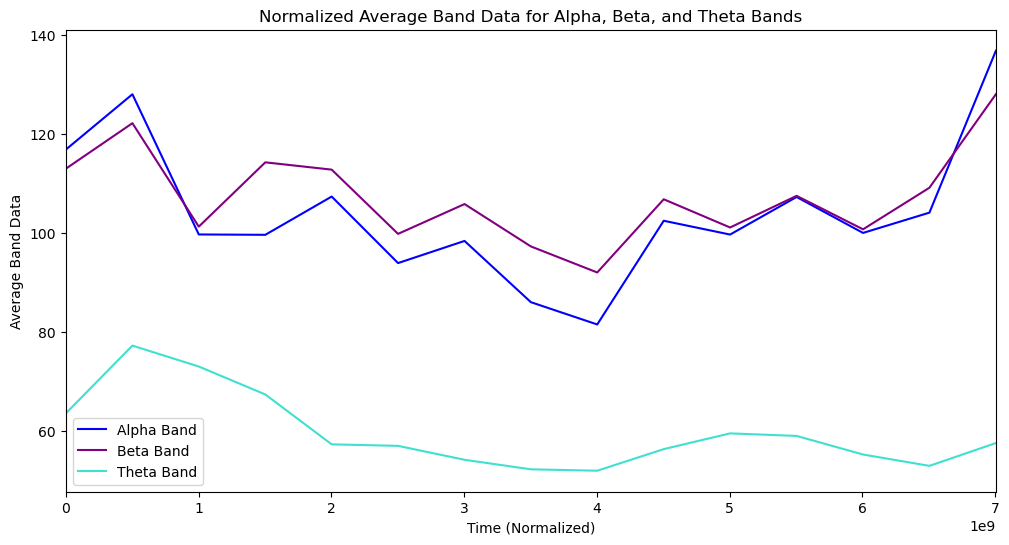

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the average data and timestamps for each band as shown before

# Normalize timestamps to start from zero for each band
alpha_normalized_timestamps = alpha_timestamps - alpha_timestamps[0]
beta_normalized_timestamps = beta_timestamps - beta_timestamps[0]
theta_normalized_timestamps = theta_timestamps - theta_timestamps[0]

# Calculate the maximum timestamp to set x-axis limits
max_timestamp = max(
    alpha_normalized_timestamps[-1],
    beta_normalized_timestamps[-1],
    theta_normalized_timestamps[-1]
)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average data for each band with normalized timestamps
ax.plot(alpha_normalized_timestamps, alpha_average_data, label='Alpha Band', color='blue')
ax.plot(beta_normalized_timestamps, beta_average_data, label='Beta Band', color='purple')
ax.plot(theta_normalized_timestamps, theta_average_data, label='Theta Band', color='turquoise')

# Add labels and a legend
ax.set_xlabel('Time (Normalized)')
ax.set_ylabel('Average Band Data')
ax.set_title('Normalized Average Band Data for Alpha, Beta, and Theta Bands')
ax.legend()

# Set x-axis limits to start from zero
ax.set_xlim(0, max_timestamp)

# Show the plot
plt.show()
